In [236]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator
import matplotlib.pyplot as plt

In [319]:

data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 100
BATCH_SIZE = 64
lr = 0.01

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [320]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)
pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
val_loader = data.DataLoader(dataset=val_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: C:\Users\Catherine\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\Catherine\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\Catherine\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\Catherine\.medmnist\breastmnist.npz


In [79]:
print(train_dataset)
print("===================")
print(test_dataset)

Dataset BreastMNIST of size 28 (breastmnist)
    Number of datapoints: 546
    Root location: C:\Users\Catherine\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0
Dataset BreastMNIST of size 28 (breastmnist)
    Number of datapoints: 156
    Root location: C:\Users\Catherine\.medmnist
    Split: test
    Task: binary-class
    Number of channels:

In [80]:
train_dataset.montage(length=1)

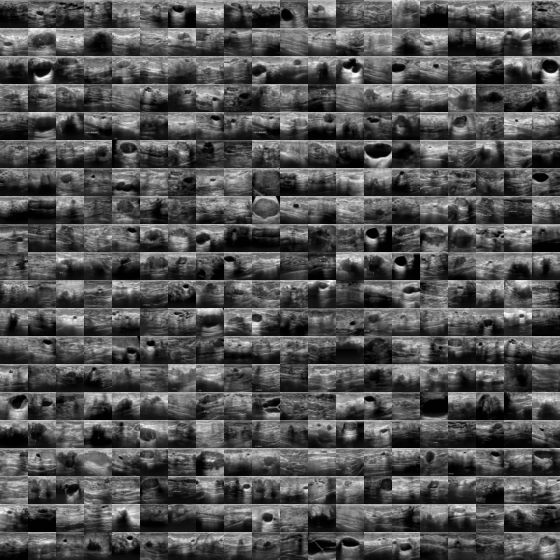

In [81]:
# montage

train_dataset.montage(length=20)

In [321]:
# define a simple CNN model

class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU())
        

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = Net(in_channels=n_channels, num_classes=n_classes)
    
# define loss function and optimizer

criterion = nn.CrossEntropyLoss()
    
optimizer = optim.SGD(model.parameters(), lr=lr)

Using device: cpu


100%|██████████| 9/9 [00:00<00:00, 53.95it/s]


Epoch [1/100], Loss: 0.6289, Training Accuracy: 0.7198
Validation Loss: 0.6636, Validation Accuracy: 0.7308


100%|██████████| 9/9 [00:00<00:00, 63.01it/s]


Epoch [2/100], Loss: 0.5648, Training Accuracy: 0.7308
Validation Loss: 0.6460, Validation Accuracy: 0.7308


100%|██████████| 9/9 [00:00<00:00, 56.51it/s]


Epoch [3/100], Loss: 0.5382, Training Accuracy: 0.7308
Validation Loss: 0.6234, Validation Accuracy: 0.7308


100%|██████████| 9/9 [00:00<00:00, 56.64it/s]


Epoch [4/100], Loss: 0.5316, Training Accuracy: 0.7308
Validation Loss: 0.5930, Validation Accuracy: 0.7308


100%|██████████| 9/9 [00:00<00:00, 53.46it/s]


Epoch [5/100], Loss: 0.5161, Training Accuracy: 0.7308
Validation Loss: 0.5591, Validation Accuracy: 0.7308


100%|██████████| 9/9 [00:00<00:00, 45.37it/s]


Epoch [6/100], Loss: 0.5072, Training Accuracy: 0.7308
Validation Loss: 0.5317, Validation Accuracy: 0.7308


100%|██████████| 9/9 [00:00<00:00, 53.34it/s]


Epoch [7/100], Loss: 0.4908, Training Accuracy: 0.7308
Validation Loss: 0.5100, Validation Accuracy: 0.7308


100%|██████████| 9/9 [00:00<00:00, 50.82it/s]


Epoch [8/100], Loss: 0.4831, Training Accuracy: 0.7308
Validation Loss: 0.4968, Validation Accuracy: 0.7308


100%|██████████| 9/9 [00:00<00:00, 54.19it/s]


Epoch [9/100], Loss: 0.4626, Training Accuracy: 0.7344
Validation Loss: 0.4872, Validation Accuracy: 0.7308


100%|██████████| 9/9 [00:00<00:00, 50.77it/s]


Epoch [10/100], Loss: 0.4625, Training Accuracy: 0.7436
Validation Loss: 0.4762, Validation Accuracy: 0.7564


100%|██████████| 9/9 [00:00<00:00, 55.70it/s]


Epoch [11/100], Loss: 0.4425, Training Accuracy: 0.7601
Validation Loss: 0.4677, Validation Accuracy: 0.7821


100%|██████████| 9/9 [00:00<00:00, 52.71it/s]


Epoch [12/100], Loss: 0.4293, Training Accuracy: 0.7729
Validation Loss: 0.4616, Validation Accuracy: 0.7821


100%|██████████| 9/9 [00:00<00:00, 58.42it/s]


Epoch [13/100], Loss: 0.4183, Training Accuracy: 0.7949
Validation Loss: 0.4489, Validation Accuracy: 0.8077


100%|██████████| 9/9 [00:00<00:00, 54.51it/s]


Epoch [14/100], Loss: 0.4017, Training Accuracy: 0.8059
Validation Loss: 0.4412, Validation Accuracy: 0.8462


100%|██████████| 9/9 [00:00<00:00, 58.61it/s]


Epoch [15/100], Loss: 0.3845, Training Accuracy: 0.8352
Validation Loss: 0.4344, Validation Accuracy: 0.8462


100%|██████████| 9/9 [00:00<00:00, 57.64it/s]


Epoch [16/100], Loss: 0.3775, Training Accuracy: 0.8352
Validation Loss: 0.4241, Validation Accuracy: 0.8333


100%|██████████| 9/9 [00:00<00:00, 55.05it/s]


Epoch [17/100], Loss: 0.3648, Training Accuracy: 0.8407
Validation Loss: 0.4085, Validation Accuracy: 0.8590


100%|██████████| 9/9 [00:00<00:00, 54.21it/s]


Epoch [18/100], Loss: 0.3371, Training Accuracy: 0.8791
Validation Loss: 0.3996, Validation Accuracy: 0.8333


100%|██████████| 9/9 [00:00<00:00, 49.64it/s]


Epoch [19/100], Loss: 0.3212, Training Accuracy: 0.8663
Validation Loss: 0.3815, Validation Accuracy: 0.8590


100%|██████████| 9/9 [00:00<00:00, 49.23it/s]


Epoch [20/100], Loss: 0.3052, Training Accuracy: 0.8846
Validation Loss: 0.3836, Validation Accuracy: 0.8205


100%|██████████| 9/9 [00:00<00:00, 52.06it/s]


Epoch [21/100], Loss: 0.2863, Training Accuracy: 0.9048
Validation Loss: 0.3660, Validation Accuracy: 0.8205


100%|██████████| 9/9 [00:00<00:00, 57.56it/s]


Epoch [22/100], Loss: 0.2556, Training Accuracy: 0.9121
Validation Loss: 0.3396, Validation Accuracy: 0.8590


100%|██████████| 9/9 [00:00<00:00, 40.46it/s]


Epoch [23/100], Loss: 0.2285, Training Accuracy: 0.9359
Validation Loss: 0.3274, Validation Accuracy: 0.8590


100%|██████████| 9/9 [00:00<00:00, 55.59it/s]


Epoch [24/100], Loss: 0.2045, Training Accuracy: 0.9451
Validation Loss: 0.3194, Validation Accuracy: 0.8590


100%|██████████| 9/9 [00:00<00:00, 52.48it/s]


Epoch [25/100], Loss: 0.1894, Training Accuracy: 0.9560
Validation Loss: 0.3077, Validation Accuracy: 0.8590


100%|██████████| 9/9 [00:00<00:00, 53.02it/s]


Epoch [26/100], Loss: 0.1759, Training Accuracy: 0.9634
Validation Loss: 0.3022, Validation Accuracy: 0.8462


100%|██████████| 9/9 [00:00<00:00, 54.93it/s]


Epoch [27/100], Loss: 0.1457, Training Accuracy: 0.9853
Validation Loss: 0.2814, Validation Accuracy: 0.8846


100%|██████████| 9/9 [00:00<00:00, 55.62it/s]


Epoch [28/100], Loss: 0.1373, Training Accuracy: 0.9853
Validation Loss: 0.2816, Validation Accuracy: 0.8846


100%|██████████| 9/9 [00:00<00:00, 56.42it/s]


Epoch [29/100], Loss: 0.1155, Training Accuracy: 0.9908
Validation Loss: 0.2773, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 55.33it/s]


Epoch [30/100], Loss: 0.1056, Training Accuracy: 0.9963
Validation Loss: 0.2681, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 52.01it/s]


Epoch [31/100], Loss: 0.0826, Training Accuracy: 0.9982
Validation Loss: 0.2538, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 58.71it/s]


Epoch [32/100], Loss: 0.0695, Training Accuracy: 1.0000
Validation Loss: 0.2616, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 57.86it/s]


Epoch [33/100], Loss: 0.0632, Training Accuracy: 1.0000
Validation Loss: 0.2719, Validation Accuracy: 0.8846


100%|██████████| 9/9 [00:00<00:00, 52.04it/s]


Epoch [34/100], Loss: 0.0527, Training Accuracy: 1.0000
Validation Loss: 0.2500, Validation Accuracy: 0.8846


100%|██████████| 9/9 [00:00<00:00, 56.13it/s]


Epoch [35/100], Loss: 0.0518, Training Accuracy: 0.9982
Validation Loss: 0.2825, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 53.09it/s]


Epoch [36/100], Loss: 0.0463, Training Accuracy: 1.0000
Validation Loss: 0.2438, Validation Accuracy: 0.8846


100%|██████████| 9/9 [00:00<00:00, 53.86it/s]

Epoch [37/100], Loss: 0.0376, Training Accuracy: 1.0000


Validation Loss: 0.2715, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 50.83it/s]


Epoch [38/100], Loss: 0.0340, Training Accuracy: 0.9982
Validation Loss: 0.2590, Validation Accuracy: 0.8846


100%|██████████| 9/9 [00:00<00:00, 54.02it/s]


Epoch [39/100], Loss: 0.0317, Training Accuracy: 1.0000
Validation Loss: 0.3309, Validation Accuracy: 0.8718


100%|██████████| 9/9 [00:00<00:00, 48.61it/s]


Epoch [40/100], Loss: 0.0292, Training Accuracy: 1.0000
Validation Loss: 0.2425, Validation Accuracy: 0.8846


100%|██████████| 9/9 [00:00<00:00, 56.64it/s]


Epoch [41/100], Loss: 0.0248, Training Accuracy: 1.0000
Validation Loss: 0.2680, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 53.53it/s]


Epoch [42/100], Loss: 0.0252, Training Accuracy: 1.0000
Validation Loss: 0.2280, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 53.32it/s]


Epoch [43/100], Loss: 0.0243, Training Accuracy: 1.0000
Validation Loss: 0.2423, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 57.43it/s]


Epoch [44/100], Loss: 0.0165, Training Accuracy: 1.0000
Validation Loss: 0.2440, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 55.17it/s]


Epoch [45/100], Loss: 0.0147, Training Accuracy: 1.0000
Validation Loss: 0.2495, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 57.25it/s]


Epoch [46/100], Loss: 0.0150, Training Accuracy: 1.0000
Validation Loss: 0.2654, Validation Accuracy: 0.8846


100%|██████████| 9/9 [00:00<00:00, 54.49it/s]


Epoch [47/100], Loss: 0.0135, Training Accuracy: 1.0000
Validation Loss: 0.2699, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 56.63it/s]


Epoch [48/100], Loss: 0.0119, Training Accuracy: 1.0000
Validation Loss: 0.2437, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 54.87it/s]


Epoch [49/100], Loss: 0.0131, Training Accuracy: 1.0000
Validation Loss: 0.2732, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 53.17it/s]


Epoch [50/100], Loss: 0.0111, Training Accuracy: 1.0000
Validation Loss: 0.2734, Validation Accuracy: 0.8846


100%|██████████| 9/9 [00:00<00:00, 56.75it/s]


Epoch [51/100], Loss: 0.0111, Training Accuracy: 1.0000
Validation Loss: 0.2479, Validation Accuracy: 0.9231


100%|██████████| 9/9 [00:00<00:00, 59.10it/s]


Epoch [52/100], Loss: 0.0100, Training Accuracy: 1.0000
Validation Loss: 0.2370, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 51.74it/s]


Epoch [53/100], Loss: 0.0093, Training Accuracy: 1.0000
Validation Loss: 0.2527, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 60.81it/s]


Epoch [54/100], Loss: 0.0079, Training Accuracy: 1.0000
Validation Loss: 0.2537, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 58.26it/s]


Epoch [55/100], Loss: 0.0078, Training Accuracy: 1.0000
Validation Loss: 0.2482, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 54.65it/s]


Epoch [56/100], Loss: 0.0077, Training Accuracy: 1.0000
Validation Loss: 0.2481, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 46.07it/s]


Epoch [57/100], Loss: 0.0068, Training Accuracy: 1.0000
Validation Loss: 0.2589, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 52.06it/s]


Epoch [58/100], Loss: 0.0080, Training Accuracy: 1.0000
Validation Loss: 0.2560, Validation Accuracy: 0.9231


100%|██████████| 9/9 [00:00<00:00, 57.38it/s]


Epoch [59/100], Loss: 0.0071, Training Accuracy: 1.0000
Validation Loss: 0.2530, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 54.18it/s]


Epoch [60/100], Loss: 0.0069, Training Accuracy: 1.0000
Validation Loss: 0.2593, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 56.88it/s]


Epoch [61/100], Loss: 0.0066, Training Accuracy: 1.0000
Validation Loss: 0.2623, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 54.22it/s]


Epoch [62/100], Loss: 0.0056, Training Accuracy: 1.0000
Validation Loss: 0.2710, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 55.24it/s]


Epoch [63/100], Loss: 0.0052, Training Accuracy: 1.0000
Validation Loss: 0.2596, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 52.95it/s]


Epoch [64/100], Loss: 0.0051, Training Accuracy: 1.0000
Validation Loss: 0.2546, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 52.88it/s]


Epoch [65/100], Loss: 0.0048, Training Accuracy: 1.0000
Validation Loss: 0.2678, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 55.43it/s]


Epoch [66/100], Loss: 0.0050, Training Accuracy: 1.0000
Validation Loss: 0.2700, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 56.77it/s]


Epoch [67/100], Loss: 0.0045, Training Accuracy: 1.0000
Validation Loss: 0.2619, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 54.78it/s]


Epoch [68/100], Loss: 0.0043, Training Accuracy: 1.0000
Validation Loss: 0.2758, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 56.53it/s]


Epoch [69/100], Loss: 0.0046, Training Accuracy: 1.0000
Validation Loss: 0.2549, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 53.96it/s]


Epoch [70/100], Loss: 0.0043, Training Accuracy: 1.0000
Validation Loss: 0.2755, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 53.55it/s]


Epoch [71/100], Loss: 0.0044, Training Accuracy: 1.0000
Validation Loss: 0.2618, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 57.81it/s]


Epoch [72/100], Loss: 0.0043, Training Accuracy: 1.0000
Validation Loss: 0.2708, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 53.95it/s]


Epoch [73/100], Loss: 0.0045, Training Accuracy: 1.0000
Validation Loss: 0.2600, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 47.76it/s]


Epoch [74/100], Loss: 0.0037, Training Accuracy: 1.0000
Validation Loss: 0.2727, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 57.34it/s]


Epoch [75/100], Loss: 0.0036, Training Accuracy: 1.0000
Validation Loss: 0.2675, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 48.03it/s]


Epoch [76/100], Loss: 0.0039, Training Accuracy: 1.0000
Validation Loss: 0.2622, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 51.34it/s]


Epoch [77/100], Loss: 0.0033, Training Accuracy: 1.0000
Validation Loss: 0.2688, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 49.64it/s]


Epoch [78/100], Loss: 0.0032, Training Accuracy: 1.0000
Validation Loss: 0.2796, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 54.21it/s]


Epoch [79/100], Loss: 0.0035, Training Accuracy: 1.0000
Validation Loss: 0.2644, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 58.31it/s]


Epoch [80/100], Loss: 0.0040, Training Accuracy: 1.0000
Validation Loss: 0.2760, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 53.37it/s]


Epoch [81/100], Loss: 0.0030, Training Accuracy: 1.0000
Validation Loss: 0.2692, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 60.60it/s]


Epoch [82/100], Loss: 0.0029, Training Accuracy: 1.0000
Validation Loss: 0.2643, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 65.78it/s]


Epoch [83/100], Loss: 0.0031, Training Accuracy: 1.0000
Validation Loss: 0.2759, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 52.26it/s]


Epoch [84/100], Loss: 0.0028, Training Accuracy: 1.0000
Validation Loss: 0.2655, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 60.36it/s]


Epoch [85/100], Loss: 0.0029, Training Accuracy: 1.0000
Validation Loss: 0.2641, Validation Accuracy: 0.9231


100%|██████████| 9/9 [00:00<00:00, 53.92it/s]


Epoch [86/100], Loss: 0.0025, Training Accuracy: 1.0000
Validation Loss: 0.2730, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 57.46it/s]


Epoch [87/100], Loss: 0.0026, Training Accuracy: 1.0000
Validation Loss: 0.2779, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 57.98it/s]


Epoch [88/100], Loss: 0.0027, Training Accuracy: 1.0000
Validation Loss: 0.2709, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 52.68it/s]


Epoch [89/100], Loss: 0.0031, Training Accuracy: 1.0000
Validation Loss: 0.2735, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 43.00it/s]


Epoch [90/100], Loss: 0.0023, Training Accuracy: 1.0000
Validation Loss: 0.2755, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 57.81it/s]


Epoch [91/100], Loss: 0.0026, Training Accuracy: 1.0000
Validation Loss: 0.2788, Validation Accuracy: 0.8974


100%|██████████| 9/9 [00:00<00:00, 50.78it/s]


Epoch [92/100], Loss: 0.0027, Training Accuracy: 1.0000
Validation Loss: 0.2649, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 56.09it/s]


Epoch [93/100], Loss: 0.0025, Training Accuracy: 1.0000
Validation Loss: 0.2822, Validation Accuracy: 0.9231


100%|██████████| 9/9 [00:00<00:00, 54.93it/s]


Epoch [94/100], Loss: 0.0020, Training Accuracy: 1.0000
Validation Loss: 0.2858, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 50.51it/s]


Epoch [95/100], Loss: 0.0021, Training Accuracy: 1.0000
Validation Loss: 0.2796, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 55.73it/s]


Epoch [96/100], Loss: 0.0021, Training Accuracy: 1.0000
Validation Loss: 0.2756, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 57.56it/s]


Epoch [97/100], Loss: 0.0019, Training Accuracy: 1.0000
Validation Loss: 0.2751, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 53.52it/s]


Epoch [98/100], Loss: 0.0024, Training Accuracy: 1.0000
Validation Loss: 0.2941, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 51.09it/s]


Epoch [99/100], Loss: 0.0019, Training Accuracy: 1.0000
Validation Loss: 0.2899, Validation Accuracy: 0.9103


100%|██████████| 9/9 [00:00<00:00, 57.98it/s]

Epoch [100/100], Loss: 0.0018, Training Accuracy: 1.0000
Validation Loss: 0.2810, Validation Accuracy: 0.9103


 Testing Accuracy: 0.9103


Text(0.5, 1.0, 'Validation Accuracy Over Epochs')

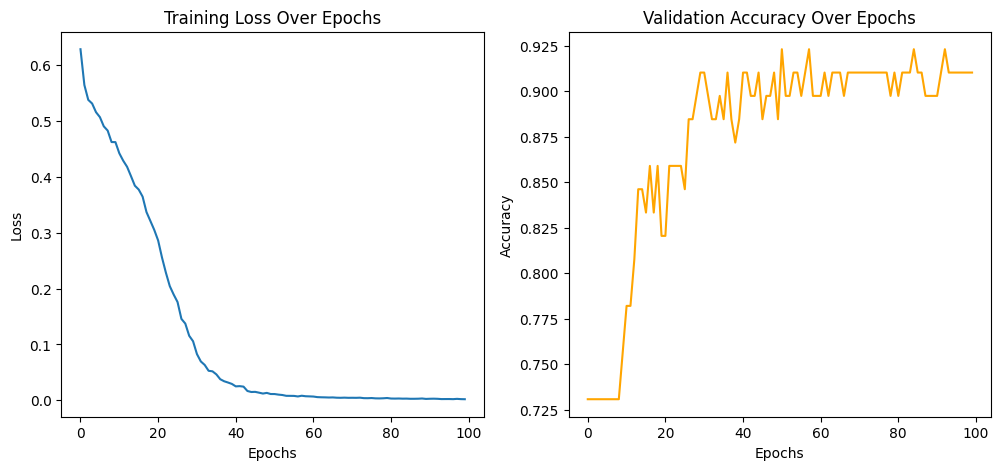

In [322]:
# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the model to GPU
model.to(device)

# train
total_loss = []
val_accuracies = []
for epoch in range(NUM_EPOCHS):
    train_correct_pred = 0
    train_total = 0
    losses = 0
  
    
    
    model.train()
    for inputs, targets in tqdm(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model(inputs)
        

        targets = targets.squeeze().long()
        loss = criterion(outputs, targets)
       
        loss.backward()
        optimizer.step()
        losses += loss.item()

 # Calculate correct predictions for accuracy (optional)
        _, predicted = torch.max(outputs, 1)
        train_correct_pred += (predicted == targets).sum().item()
        train_total += targets.size(0)

    # Average loss for the epoch
    avg_loss = losses / len(train_loader)
    total_loss.append(avg_loss)
    train_accuracy = train_correct_pred / train_total

    print(f"Epoch [{epoch + 1}/{NUM_EPOCHS}], Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")


       
# Validation phase
    model.eval()  # Set the model to evaluation mode
    val_correct_pred = 0
    val_total = 0
    val_loss = 0.0

    with torch.no_grad():
        for inputs, targets in val_loader:  # Use validation data loader
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_correct_pred += (predicted == targets).sum().item()
            val_total += targets.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct_pred / val_total
    val_accuracies.append(val_accuracy)

    print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

#Testing

model.eval()  # Set the model to evaluation mode
test_correct_pred = 0
test_total = 0
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:  # Use validation data loader
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)

        targets = targets.squeeze().long()
        loss = criterion(outputs, targets)
        val_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        test_correct_pred += (predicted == targets).sum().item()
        test_total += targets.size(0)
        
    test_accuracy = val_correct_pred / val_total


    print(f" Testing Accuracy: {val_accuracy:.4f}")






plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(total_loss)), total_loss, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(
    range(len(val_accuracies)),
    val_accuracies,
    label="Validation Accuracy",
    color="orange",
)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Over Epochs")